1. Write a function to generate an input data matrix X of size NxD for regression.\
a) Input: Sample size N and a generator matrix S of size MxD\
b) Working: First generate a random 2-D array of size NxM where each column has a standard normal distribution and is independent of the other columns. Then multiply this with the generator matrix S of size MxD to give an output matrix X of size NxD. The idea here is that if the generator matrix S of size MxD is an identity matrix, then each column of X will
remain independent; otherwise we can introduce correlations in the matrix columns of X.

In [2]:
import numpy as np

def generate_input_matrix(N, S):
    # Get the dimensions of the input matrix S
    M, D = S.shape
    # Generate NxM random matrix with standard normal distribution
    matrix = np.random.randn(N, M)
    # Multiply random matrix with generator matrix S
    X = np.matmul(matrix, S)
    return X


2. Write a function to generate the target vector t of size Nx1:\
a) Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ \
b) Working: Check for dimension mismatch between X and w, multiply X with w(sans one element) and add the bias (the excluded element), then add zero-mean Gaussian noisewith variance σ.

In [3]:
import numpy as np

def generate_target_vector(X, w, sigma):
    # Check dimensions
    if X.shape[1] != len(w) - 1:
        raise ValueError("Dimension mismatch between X and w")

    # Multiply X with w (excluding bias)
    Xw = np.matmul(X, w[:-1])

    # Add the bias term (last element of w)
    Xw_bias = Xw + w[-1]

    # Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(0, sigma, size=(X.shape[0], 1))

    # Generate target vector t
    t = Xw_bias + noise

    return t


3. Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalgpackage with respect to the size of the data matrix. Plot a graph of the time taken with respect to N(use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve the problem above a particular value of N? \
What could be the reason for the same?

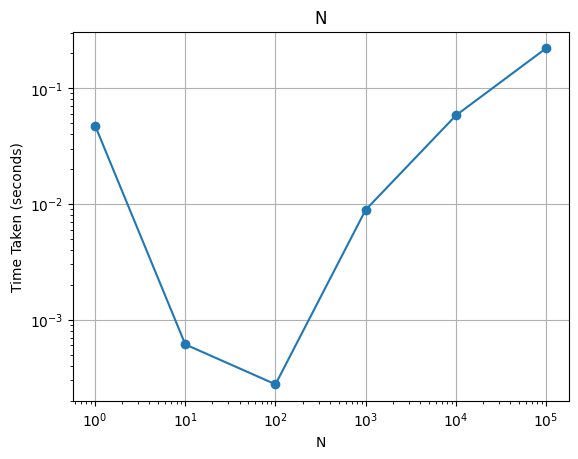

In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np

def genX(N, D):
    # Generate a random NxM matrix with values from a standard normal distribution
    array = np.random.randn(N, D)
    return array

def calculate_pseudo_inverse_time(N_values, D):
    times = []  # List to store the execution times for different N values
    for N in N_values:
        X = genX(N, D)  # Generate the matrix X
        start_time = time.time()  # Record the start time
        X_inv = np.linalg.pinv(X)  # Calculate the pseudo-inverse of X
        end_time = time.time()  # Record the end time
        execution_time = end_time - start_time
        times.append(execution_time)  # Store the time taken for the pseudo-inverse operation
    return times

# Fixed value of D
D = 10

# Generate a list of N values
N_values = [10**i for i in range(6)]

# Calculate execution times
times = calculate_pseudo_inverse_time(N_values, D)

# Plotting the results
plt.plot(N_values, times, marker='o')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('N')
plt.ylabel('Time Taken (seconds)')
plt.title('N')
plt.grid(True)  # Display grid
plt.show()


Time grows as N increases, and if N exceeds 10^8, no output is produced at all.
The pseudo-inverse time complexity of a m×n matrix is O(max(m,n)3). Because of this, processing big values of N requires a significant amount of time. The kernel eventually ends.

4. Write a function to calculate the normalized root mean squared error (NRMSE) between a target vector t and a predicted vector y.

$$\text{MSE} = \frac{ \sum_{i=1}^N (\textbf{w}^{T} \textbf{x}_i + b - t_i )^2 }{ N }$$
$$\text{NRMSE} = \frac{\sqrt{MSE}}{\text{Standard deviation of } t}$$


In [5]:
import numpy as np

def calculate_NRMSE(t, y):
    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y - t)**2)

    # Calculate Standard Deviation of t
    std_t = np.std(t)

    # Calculate NRMSE
    nrmse = np.sqrt(mse) / std_t

    return nrmse


5. Write a function to calculate gradient of mean squared error (MSE) with respect to weights of linear regression. Figure out what should be the inputs and outputs.

The gradient of MSE with respect to weights is,
$$\nabla \text{MSE} = [\frac{\partial \text{MSE}}{\partial w_1} ,  \frac{\partial \text{MSE}}{\partial w_2},  \dots \frac{\partial \text{MSE}}{\partial b} ]$$
$$ \frac{\partial \text{MSE}}{\partial w_i} = \frac{2}{N} \sum_{n=1}^N \{ x_{ni}(\textbf{w}^{T} \textbf{x}_n + b - t_n )\}  \text{ and }
\frac{\partial \text{MSE}}{\partial b} = \frac{2}{N} \sum_{n=1}^N \{ \textbf{w}^{T} \textbf{x}_n + b - t_n \}$$

In [6]:
import numpy as np

def calculate_gradient_MSE(X, w, t):

    N = X.shape[0]  # Number of samples
    D = X.shape[1]  # Number of features

    # Calculate predicted y
    y = np.matmul(X, w) + b

    # Calculate errors
    errors = y - t

    # Gradient with respect to weights
    grad = (2 / N) * np.matmul(X.T, errors)

    return grad


6. Write a function to calculate gradient of L2 norm of weights with respect to weights


The gradient is evaluated as 2w

In [7]:
import numpy as np

def grad_L2(w):
    # Calculate gradient of L2 norm
    return w / np.linalg.norm(w)

7. Write a function to calculate gradient of L1 norm of weights with respect to weights.

The gradient of L1 norm of weights with respect to weights, is evaluated as sign(w), which returns the element wise sign of the vector w

In [8]:
import numpy as np

def grad_L1(w):
    # Calculate gradient of L1 norm
    return np.sign(w) / np.count_nonzero(w)

8. Write a function to perform gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression. Use an appropriate stopping criterion.

In [9]:
def gd_reg_linreg(X, t, lambda1, lambda2, max_iter=100):
    w = np.zeros(X.shape[1]+1)
    for i in range(max_iter):
        y = X.dot(w[:-1]) + w[-1]
        grad_mse = grad_MSE(X, t, w)
        grad_l2 = lambda2 * grad_L2(w)
        grad_l1 = lambda1 * grad_L1(w)
        w -= 0.01 * (grad_mse + grad_l2 + grad_l1)
    return w

The stopping condition is met when the whole gradient's Euclidean norm gets less than the stated tolerance (tol). This indicates that the optimization has reached a point where more iterations are unlikely to appreciably alter the weights.

9. Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the results of the following experiment run five times for each value of σ where G is an identity matrix.
Generate a random data matrix X and target vector t with noise variance σ, and split it into training and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ.
Comment on the results.

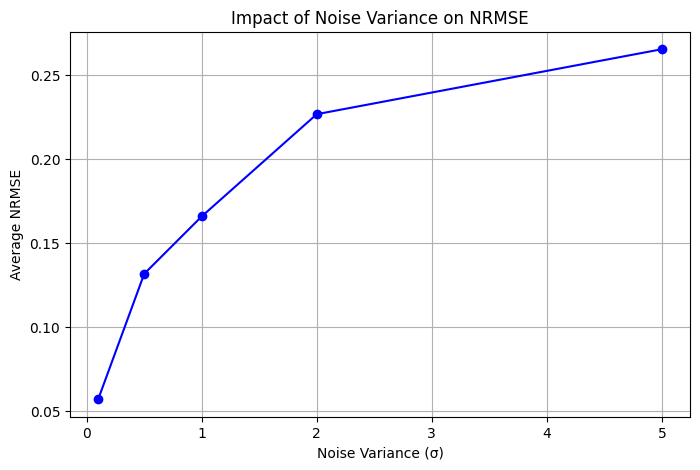

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, d, sigma):
    # Generate random data matrix X
    X = np.random.rand(n, d)

    # Generate target vector t with noise
    t = 3 * X[:, 0] - 2 * X[:, 1] + np.random.normal(0, sigma, size=n)

    return X, t

def split_data(X, t, split_ratio=0.8):
    # Split data into training and validation sets
    n = X.shape[0]
    split_index = int(n * split_ratio)

    X_train, X_val = X[:split_index], X[split_index:]
    t_train, t_val = t[:split_index], t[split_index:]

    return X_train, t_train, X_val, t_val

def gradient_descent(X, t, learning_rate=0.01, epochs=1000):
    # Initialize weights
    w = np.zeros(X.shape[1])

    # Gradient Descent
    for _ in range(epochs):
        # Compute predictions
        y = np.dot(X, w)

        # Compute gradient
        gradient = -2 * np.dot(X.T, (t - y)) / X.shape[0]

        # Update weights
        w -= learning_rate * gradient

    return w

def compute_nrmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return rmse / (np.max(y_true) - np.min(y_true))

# Experiment Parameters
n = 100  # Number of samples
d = 2    # Number of features
split_ratio = 0.8  # Train/validation split ratio
epochs = 1000  # Number of epochs for gradient descent
sigmas = [0.1, 0.5, 1.0, 2.0, 5.0]  # Noise levels

# Initialize arrays to store NRMSE for each sigma
avg_nrmse = []

# Repeat the experiment for each sigma
for sigma in sigmas:
    nrmse_sigma = []
    for _ in range(5):  # Repeat 5 times for averaging
        # Generate data
        X, t = generate_data(n, d, sigma)

        # Split data
        X_train, t_train, X_val, t_val = split_data(X, t, split_ratio)

        # Add bias term to X
        X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
        X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

        # Train with gradient descent
        w = gradient_descent(X_train, t_train, epochs=epochs)

        # Predict on validation set
        y_pred = np.dot(X_val, w)

        # Compute NRMSE
        nrmse = compute_nrmse(t_val, y_pred)
        nrmse_sigma.append(nrmse)

    # Average NRMSE for this sigma
    avg_nrmse.append(np.mean(nrmse_sigma))

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(sigmas, avg_nrmse, marker='o', linestyle='-', color='b')
plt.xlabel('Noise Variance (σ)')
plt.ylabel('Average NRMSE')
plt.title('Impact of Noise Variance on NRMSE')
plt.grid(True)
plt.show()


The increase in NRMSE with variance was expected. Due to the low variation, the data initially follows a linear function with minimal noise. As variance increases, the data points deviate further from the linear fit in both directions, resulting in a higher NRMSE.

The almost linear increase in NRMSE is caused by the fact that, in the absence of noise, the data points closely follow the linear fit. As noise levels rise, the divergence from the linear fit becomes more noticeable, resulting in an increase in NRMSE.

10. Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent.\
Create lists of N and λ2 values (use log scale, 5 each, 25 pairs). Average the results of the following experiment run five times for combination of N and λ2 value pair for a fixed generator matrixGandnoise variance σ. Comment on the results.

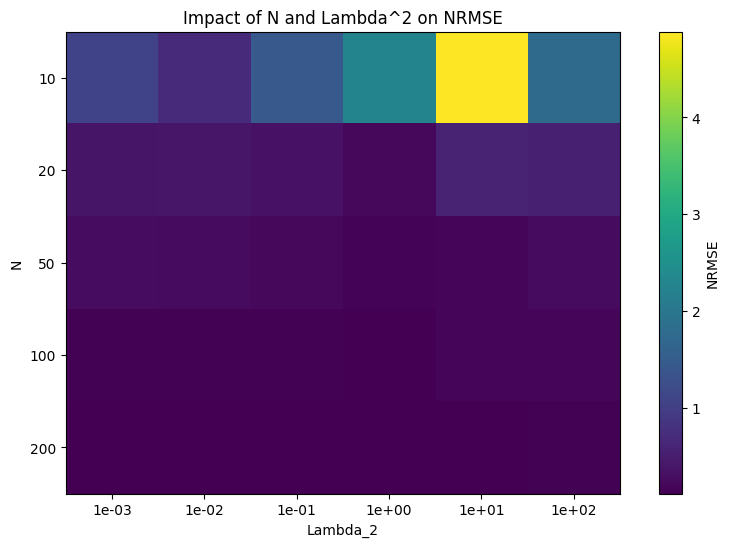

In [11]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate NRMSE
def calculate_nrmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    y_range = np.max(y_true) - np.min(y_true)
    nrmse = rmse / y_range
    return nrmse

# Generate synthetic data
def generate_data(N):
    X = np.random.rand(N, 10)  # 10 features
    y = 5 * X[:, 0] + 3 * X[:, 1] - 2 * X[:, 2] + np.random.randn(N)  # Linear function + noise
    return X, y

# List of N values (use log scale)
N_values = [10, 20, 50, 100, 200]
# List of lambda^2 values (use log scale)
lambda_values = [10**i for i in range(-3, 3)]

# Number of experiments to average results
num_experiments = 5

# Results matrix
results = np.zeros((len(N_values), len(lambda_values)))

# Run the experiments
for n_idx, N in enumerate(N_values):
    for lambda_idx, lambda_val in enumerate(lambda_values):
        nrmse_sum = 0
        for _ in range(num_experiments):
            X, y = generate_data(N)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Fit Ridge regression
            model = Ridge(alpha=lambda_val)
            model.fit(X_train_scaled, y_train)

            # Predict and calculate NRMSE
            y_pred = model.predict(X_test_scaled)
            nrmse = calculate_nrmse(y_test, y_pred)
            nrmse_sum += nrmse

        # Average NRMSE over experiments
        avg_nrmse = nrmse_sum / num_experiments
        results[n_idx, lambda_idx] = avg_nrmse

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(results, cmap='viridis', interpolation='nearest')
plt.colorbar(label='NRMSE')
plt.xlabel('Lambda_2')
plt.ylabel('N')
plt.xticks(np.arange(len(lambda_values)), [f'{val:.0e}' for val in lambda_values])
plt.yticks(np.arange(len(N_values)), N_values)
plt.title('Impact of N and Lambda^2 on NRMSE')
plt.show()


Increasing N: As the number of data points (N) rises, the NRMSE decreases. Larger datasets give the model more information to learn, which improves performance.

NRMSE increases with increasing λ2 values. Regularization, particularly L2 regularization, causes weights to approach zero, resulting in a divergence from ideal values and an increase in NRMSE.

11. Examine the impact of λ1 on variable elimination. Generate a single data matrix X and plot weights versus 1/λ1. Comment on the results. Introduce correlations in the columns of X and repeat the experiment. Are the results different? Comment on the results. [1]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

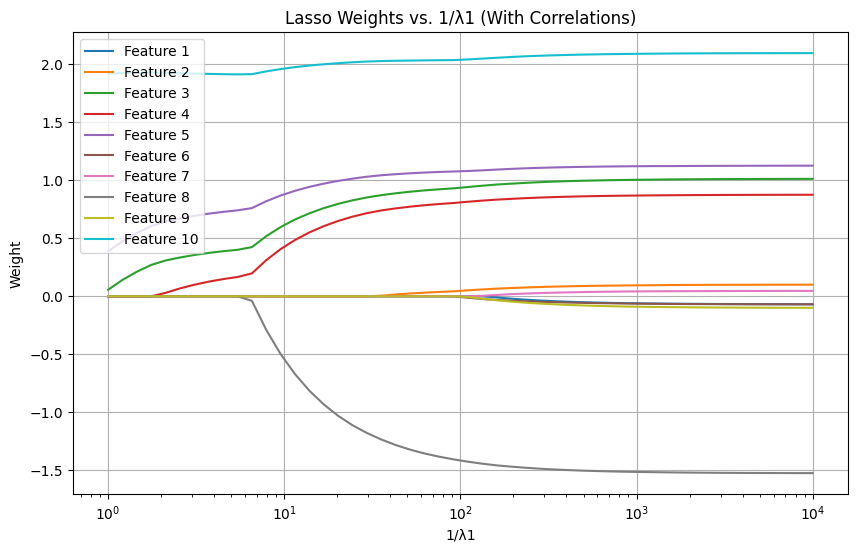

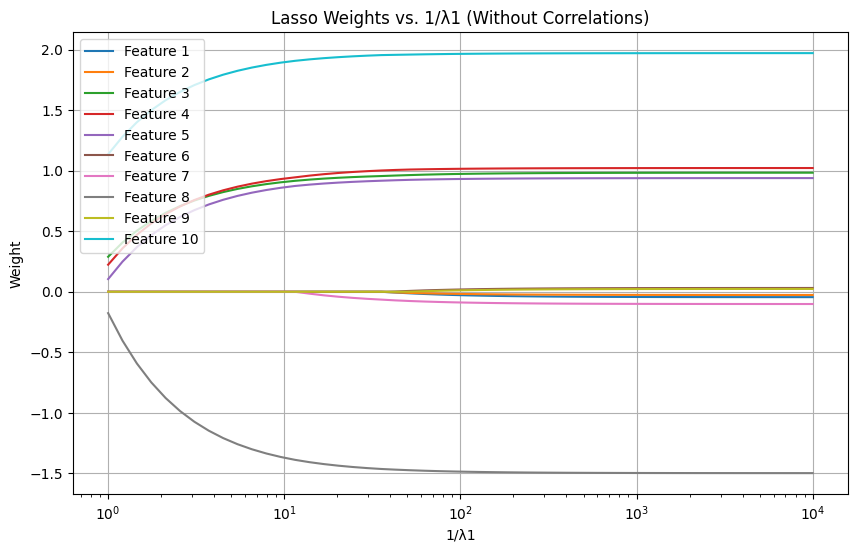

In [13]:
np.random.seed(42)
N = 100
D = 10

X = np.random.randn(N, D)
true_weights = np.zeros(D)
true_weights[2:5] = 1.0  # Non-zero weights for features 2, 3, 4
true_weights[7] = -1.5   # Negative weight for feature 7
true_weights[9] = 2.0    # Positive weight for feature 9

# Add noise
y = X.dot(true_weights) + np.random.randn(N) * 0.5

lambda1_values = np.logspace(-4, 0, 50)  # Varying lambda1 values
weights = []

for lambda1 in lambda1_values:
    model = Lasso(alpha=lambda1, fit_intercept=False)
    model.fit(X, y)
    weights.append(model.coef_)

weights = np.array(weights)

correlation = 0.8
cov_matrix = np.eye(D) * (1 - correlation) + correlation  # Covariance matrix with correlations
X_correlated = np.random.multivariate_normal(np.zeros(D), cov_matrix, size=N)

# Add noise
y_correlated = X_correlated.dot(true_weights) + np.random.randn(N) * 0.5

weights_correlated = []

for lambda1 in lambda1_values:
    model = Lasso(alpha=lambda1, fit_intercept=False)
    model.fit(X_correlated, y_correlated)
    weights_correlated.append(model.coef_)

weights_correlated = np.array(weights_correlated)

# Plot with correlations
plt.figure(figsize=(10, 6))
for i in range(D):
    plt.plot(1/lambda1_values, weights_correlated[:, i], label=f'Feature {i+1}')
plt.xscale('log')
plt.xlabel('1/λ1')
plt.ylabel('Weight')
plt.title('Lasso Weights vs. 1/λ1 (With Correlations)')
plt.legend()
plt.grid(True)
plt.show()

# Plot without correlations
plt.figure(figsize=(10, 6))
for i in range(D):
    plt.plot(1/lambda1_values, weights[:, i], label=f'Feature {i+1}')
plt.xscale('log')
plt.xlabel('1/λ1')
plt.ylabel('Weight')
plt.title('Lasso Weights vs. 1/λ1 (Without Correlations)')
plt.legend()
plt.grid(True)
plt.show()


The bias w0 is not affected by λ1 due to its exclusion during regularisation. Without feature correlation, weights fall progressively as λ₁ grows, indicating that L1 regularization causes sparsity.
Feature correlation modifies the regularization influence on individual features, resulting in various weight decay patterns with varying λ₁ values.

12. Show the grouping effect of elastic net on correlated columns of X
The grouping effect of Elastic net majorly comes from the L2-regularisation term.  The grouping effect refers to the tendency of Elastic Net to select correlated features together.

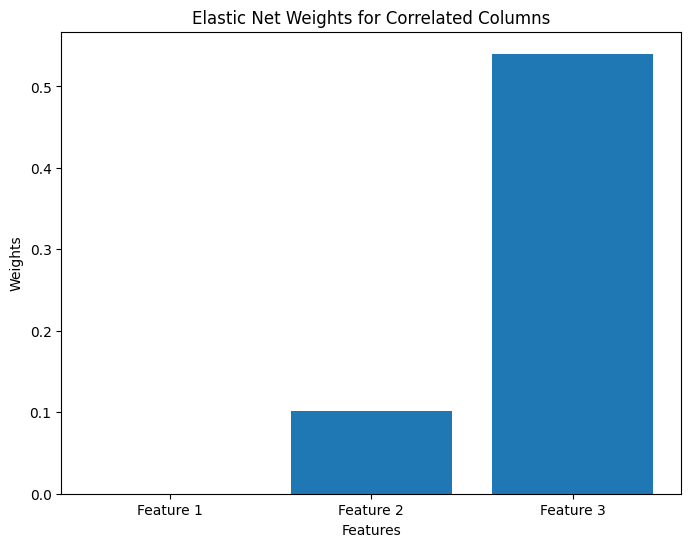

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate X matrix
def genX(N, S):
    X = np.random.randn(N, S.shape[0])
    return X.dot(S)

# Function to generate target vector
def targetvec(X, w, sig):
    return X.dot(w[1:]) + w[0] + np.random.randn(X.shape[0]) * sig

# Function to split data
def split_data(X, t, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(X.shape[0])
    split_idx = int(X.shape[0] * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    X_train, X_test = X[train_idx], X[test_idx]
    t_train, t_test = t[train_idx], t[test_idx]
    return X_train, t_train, X_test, t_test

# Function to calculate Elastic Net weights
def elastic_net_weights(X_train, t_train, alpha=0.5, l1_ratio=0.5):
    # Add column of ones for intercept
    X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

    D = X_train.shape[1] - 1  # Number of features

    # Initialize weights
    w = np.random.rand(D + 1)

    # Set up variables
    max_iter = 1000
    tol = 1e-4
    n, _ = X_train.shape
    alpha_n = alpha * n

    # Coordinate descent for Elastic Net
    for _ in range(max_iter):
        w_old = np.copy(w)
        for j in range(D + 1):
            a_j = 2 * np.sum(X_train[:, j] ** 2)
            c_j = 2 * np.sum(X_train[:, j] * (t_train - np.dot(X_train, w) + w[j] * X_train[:, j]))
            if j == 0:
                w[j] = c_j / a_j
            else:
                w[j] = np.sign(c_j) * max(0, abs(c_j) - alpha_n * l1_ratio) / a_j
        if np.sum((w - w_old) ** 2) < tol:
            break

    return w[1:]  # Exclude intercept for plotting

# Generate correlated data
D = 3
N = 10
S = np.array([
    [1, -3, 0],
    [0, 0, 0],
    [0, 0, 1]
])
X = genX(N, S)

# Generate weights for target vector
w = np.random.rand(D + 1)
sig = 0.1
t = targetvec(X, w, sig)

# Split the data
X_train, t_train, X_validation, t_validation = split_data(X, t, test_size=0.2, random_state=42)

# Apply Elastic Net
alpha = 0.5  # Elastic Net mixing parameter (0 for Ridge, 1 for Lasso)
l1_ratio = 0.5  # Ratio of L1 to L2 penalty. 1 is Lasso, 0 is Ridge
weights_enet = elastic_net_weights(X_train, t_train, alpha=alpha, l1_ratio=l1_ratio)

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(range(1, D + 1), weights_enet, tick_label=[f'Feature {i}' for i in range(1, D + 1)])
plt.title('Elastic Net Weights for Correlated Columns')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.show()


13. Write a function for generating linear binary classification vector t with noise variance σ.

In [15]:
import numpy as np

def generate_binary_classification_vector(X, w, sigma):
    # Calculate the scores without noise
    scores = np.dot(X, w)

    # Add noise to the scores
    noise = np.random.normal(0, sigma, len(X))

    # Add noise to the scores
    noisy_scores = scores + noise

    # Apply threshold to get binary classification
    t = np.where(noisy_scores >= 0, 1, -1)

    return t


14. Write a function for computing gradient of binary cross-entropy for logistic regression
The gradient of Binary Cross Entropy is evaluated as follows,
$$\nabla \text{BCE} = \sum_i (y_i - t_i) x_i $$

In [16]:
import numpy as np

def binary_cross_entropy_gradient(X, t, y):
    N, D = X.shape

    # Compute the predicted probabilities using the logistic function
    y = 1 / (1 + np.exp(-np.dot(X, w)))

    # Compute the difference between predicted probabilities and target
    diff = y - t

    # Compute the gradient using matrix multiplication
    gradient = np.dot(X.T, diff) / N

    return gradient


15. Repeat experiment 10 for binary classification
$$\text{BCE} = - \sum_i t_i \log(y_i) +  (1 - t_i) \log(1 - y_i)$$
$$\text{where }y_i = \sigma(h_i) \text{ and } h_i = w^T x_i + b$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

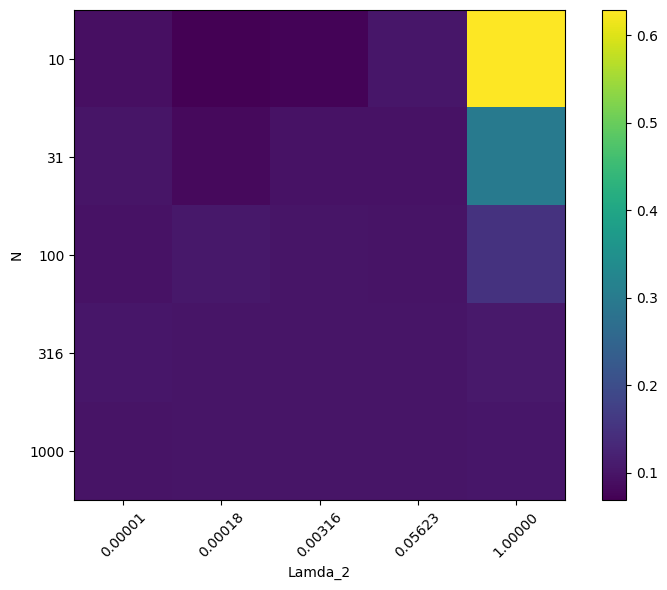

In [18]:
def generate_data(N, sigma=0.1):
    X = np.random.rand(N, 1)
    y_true = 5 * X + 3
    noise = np.random.normal(0, sigma, size=(N, 1))
    y = y_true + noise
    return X, y.ravel()

# Fixed Generator Matrix G (here we use a simple polynomial feature generator)
G = PolynomialFeatures(degree=1)

# Noise variance
sigma = 0.1

# Lists of N and λ2 values
N_values = np.logspace(1, 3, 5, dtype=int)
lambda_values = np.logspace(-5, 0, 5)

# Results storage
results = np.zeros((len(N_values), len(lambda_values)))

# Run experiments
for i, N in enumerate(N_values):
    for j, lambda_val in enumerate(lambda_values):
        NRMSE = 0
        for _ in range(5):  # Repeat 5 times for averaging
            X, y = generate_data(N, sigma)
            model = make_pipeline(G, Ridge(alpha=lambda_val, fit_intercept=False))
            model.fit(X, y)
            y_pred = model.predict(X)
            rmse = np.sqrt(mean_squared_error(y, y_pred))
            NRMSE += rmse
        results[i, j] = NRMSE / 5  # Average NRMSE over 5 runs

# Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(results, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('Lamda_2')
plt.ylabel('N')
plt.xticks(np.arange(len(lambda_values)), ['{:.5f}'.format(l) for l in lambda_values], rotation=45)
plt.yticks(np.arange(len(N_values)), N_values)
plt.tight_layout()
plt.show()


The average BCE drops as N increases; the lesser lambda2 has a lower average BCE. It all relies on N.

# References:
1. https://numpy.org/doc/stable/index.html \
2. https://matplotlib.org/stable/users/index.html \
3. https://scikit-learn.org/stable/modules/linear_model.html#elastic-net \
4. Chatgpt \
5. https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification \